<a href="https://colab.research.google.com/github/youssefbelkhiri/machine_learning_models/blob/main/tomorrow_raining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
!git clone https://github.com/youssefbelkhiri/machine_learning_models.git

Cloning into 'machine_learning_models'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 41 (delta 7), reused 27 (delta 2), pack-reused 0
Receiving objects: 100% (41/41), 9.42 MiB | 3.93 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [11]:
%cd machine_learning_models

/content/machine_learning_models/tomorrow_raining_prediction/machine_learning_models


In [12]:
%ls

'Humidity Prediction'/     tempurature_prediction_model.ipynb   tomorrow_raining_prediction/
 london_weather.csv        today_raining_predction/            'Visibilty Prediction'/
 README.md                 today_raining_prediction.ipynb       weatherAUS.csv
 tempurature_prediction/   tomorrow_raining.ipynb              'Wind Speed Prediction'/


In [13]:
%cd tomorrow_raining_prediction/

/content/machine_learning_models/tomorrow_raining_prediction/machine_learning_models/tomorrow_raining_prediction


In [14]:
dataset = pd.read_csv("weatherAUS.csv")

In [15]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [16]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [17]:
dataset['WindGustDir'] = dataset['WindGustDir'].fillna(dataset['WindGustDir'].mode()[0])
dataset['WindDir9am'] = dataset['WindDir9am'].fillna(dataset['WindDir9am'].mode()[0])
dataset['WindDir3pm'] = dataset['WindDir3pm'].fillna(dataset['WindDir3pm'].mode()[0])
dataset['RainToday'] = dataset['RainToday'].fillna(dataset['RainToday'].mode()[0])

In [18]:
def wrangle(data):
  data = data.copy()
  data["Date"] = pd.to_datetime(data["Date"])
  data['Month'] = data["Date"].dt.month
  data['Year'] = data["Date"].dt.year
  data['Day'] = data["Date"].dt.day
  # data = data[data["Year"]<2014]
  data = data.drop("Date", axis=1)
  # data = data[data["Location"]=="Sale"]
  # data = data.drop('Location', axis=1)
  data = data.dropna(axis=0, how='any', subset=["RainTomorrow"])
  return data

In [19]:
dataset=wrangle(dataset)

In [20]:
categorical_features = ['Year', 'Month', 'Location' , 'Day', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday']

In [21]:
dataset.columns


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Year', 'Day'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder

lencoders = {}
features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow']
for col in dataset[features].columns:
    lencoders[col] = LabelEncoder()
    dataset[col] = lencoders[col].fit_transform(dataset[col])

In [23]:
dataset[categorical_features].head()

Year  Month  Location  Day  WindGustDir  WindDir9am  WindDir3pm  RainToday
0     1     11         2    0           13          13          14          0
1     1     11         2    1           14           6          15          0
2     1     11         2    2           15          13          15          0
3     1     11         2    3            4           9           0          0
4     1     11         2    4           13           1           7          0

In [24]:
dataset.shape

(142193, 25)

In [25]:
dataset.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
Month                0
Year                 0
Day                  0
dtype: int64

In [26]:
encoded_data = dataset.copy()

In [27]:
numerical_columns = encoded_data.select_dtypes(include=['int','float','float64']).columns
print(numerical_columns)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Year', 'Day'],
      dtype='object')


In [28]:
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']
print(encoded_data[numerical_features].describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.0000

In [29]:
encoded_data[numerical_features].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [30]:
total = encoded_data[numerical_features].isnull().sum().sort_values(ascending=False)
percent = (encoded_data[numerical_features].isnull().sum()/encoded_data[numerical_features].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(21)

Total   Percent
Sunshine       67816  0.476929
Evaporation    60843  0.427890
Cloud3pm       57094  0.401525
Cloud9am       53657  0.377353
Pressure9am    14014  0.098556
Pressure3pm    13981  0.098324
WindGustSpeed   9270  0.065193
Humidity3pm     3610  0.025388
Temp3pm         2726  0.019171
WindSpeed3pm    2630  0.018496
Humidity9am     1774  0.012476
Rainfall        1406  0.009888
WindSpeed9am    1348  0.009480
Temp9am          904  0.006358
MinTemp          637  0.004480
MaxTemp          322  0.002265

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputed_data = encoded_data.copy(deep=True)
mice_imputer = IterativeImputer()
imputed_data.iloc[:, :] = mice_imputer.fit_transform(encoded_data)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
<ipython-input-31-b9faddd87c48>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  imputed_data.iloc[:, :] = mice_imputer.fit_transform(encoded_data)


In [32]:
imputed_data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Year             0
Day              0
dtype: int64

MinTemp


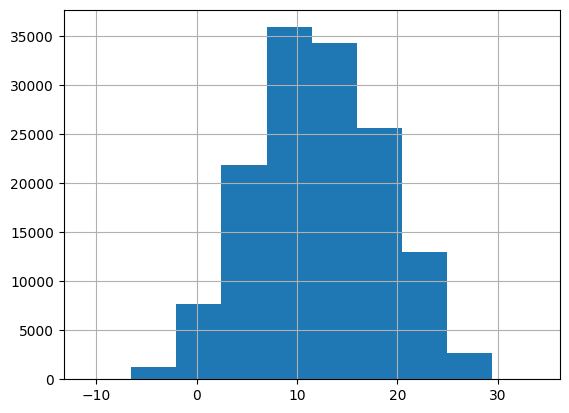

MaxTemp


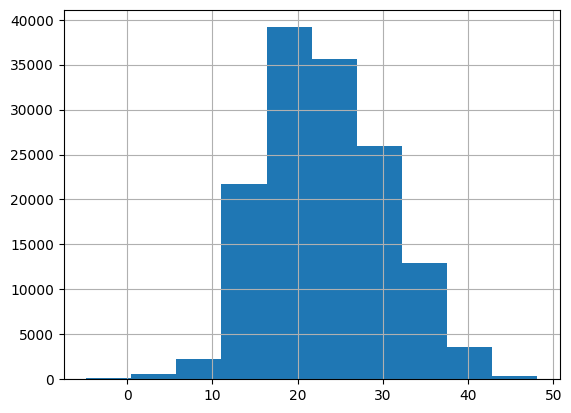

Rainfall


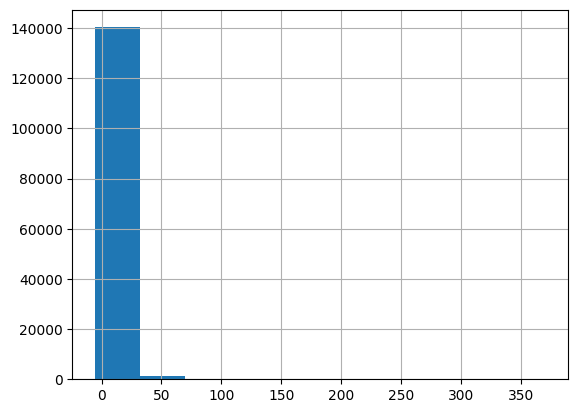

Evaporation


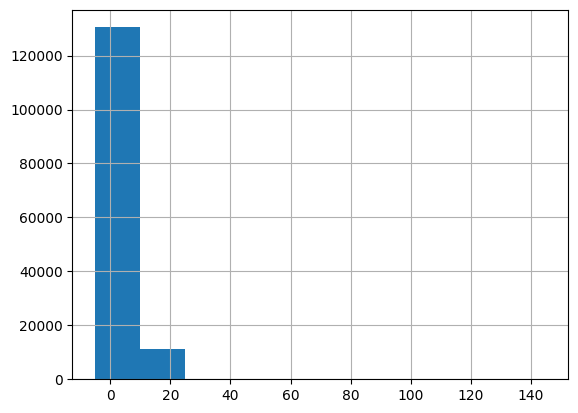

Sunshine


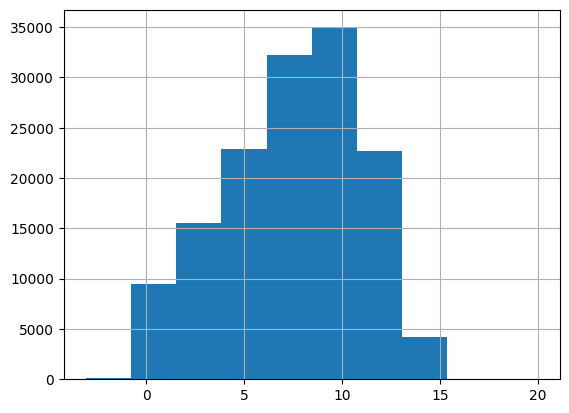

WindGustSpeed


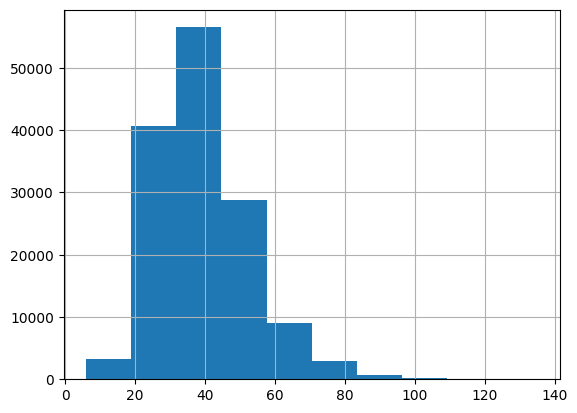

WindSpeed9am


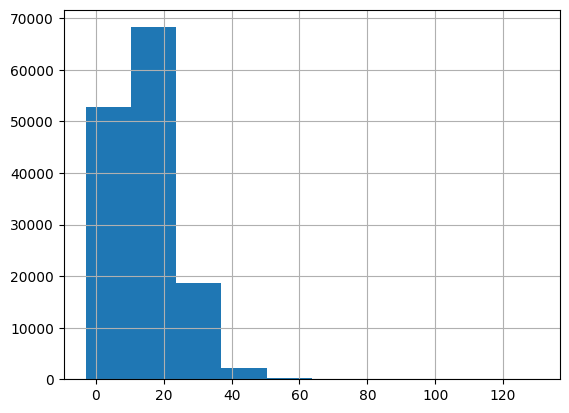

WindSpeed3pm


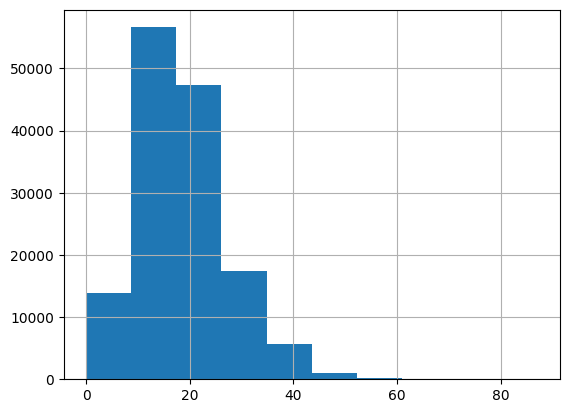

Humidity9am


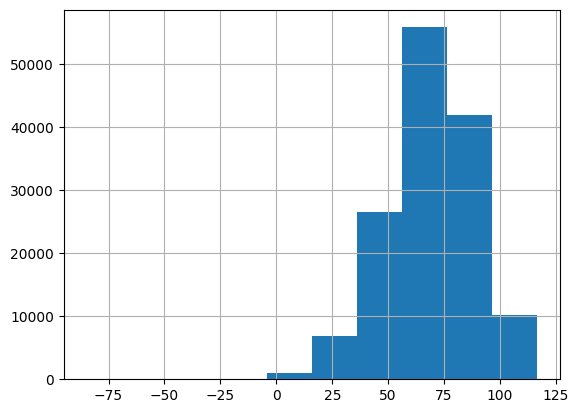

Humidity3pm


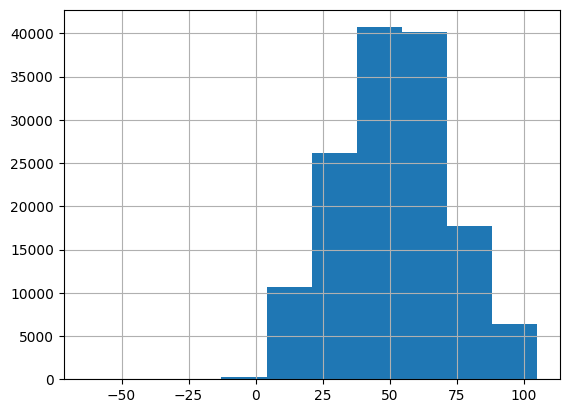

Pressure9am


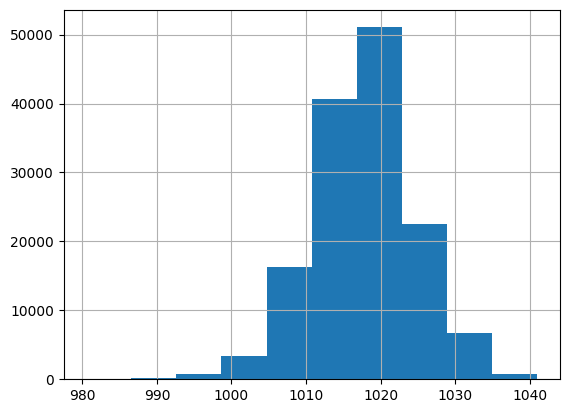

Pressure3pm


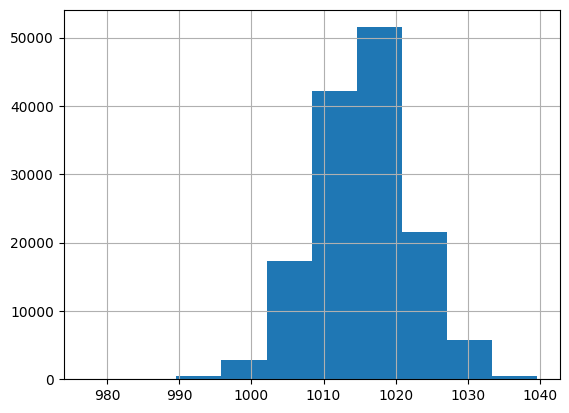

Cloud9am


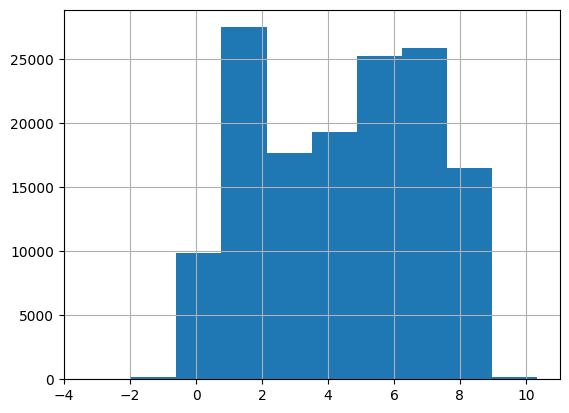

Cloud3pm


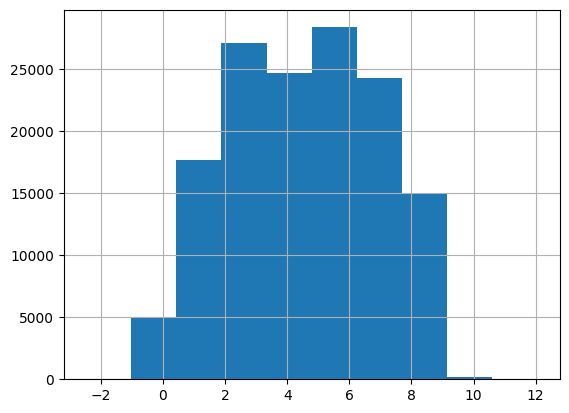

Temp9am


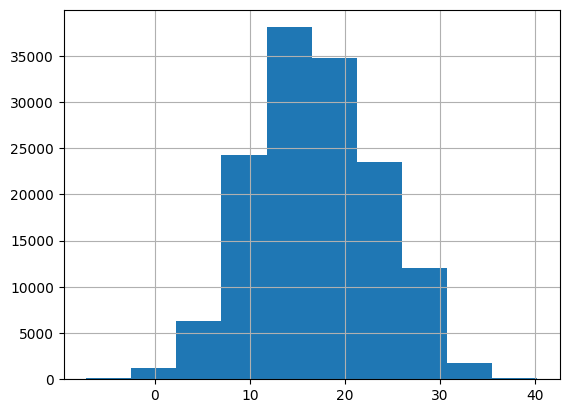

Temp3pm


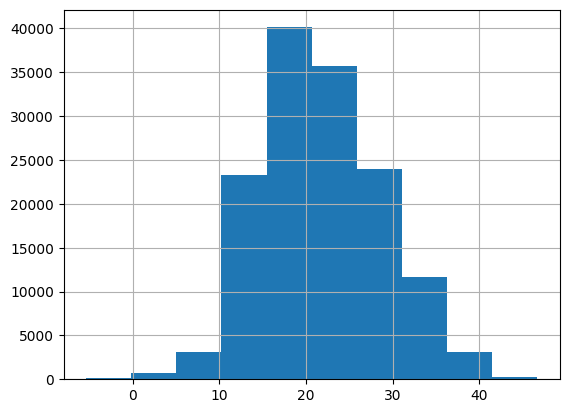

In [33]:
for i, column in enumerate(imputed_data[numerical_features]):
    print(column)
    plt.figure(i)
    imputed_data[column].hist()
    plt.show()

<ipython-input-34-b159429c3a99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data = normalized_data, palette = "Set1")


<Axes: xlabel='RainTomorrow', ylabel='count'>

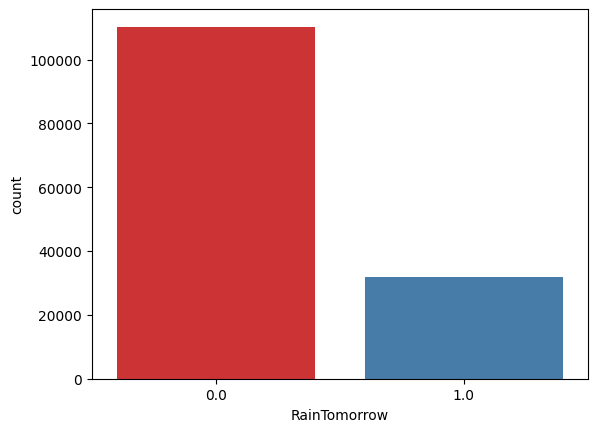

In [34]:
import seaborn as sns
normalized_data = imputed_data.copy()
sns.countplot(x='RainTomorrow', data = normalized_data, palette = "Set1")

<ipython-input-35-d12ae99d47e1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data = oversampled_data, palette = "Set1").set(title='RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')


[Text(0.5, 1.0, 'RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')]

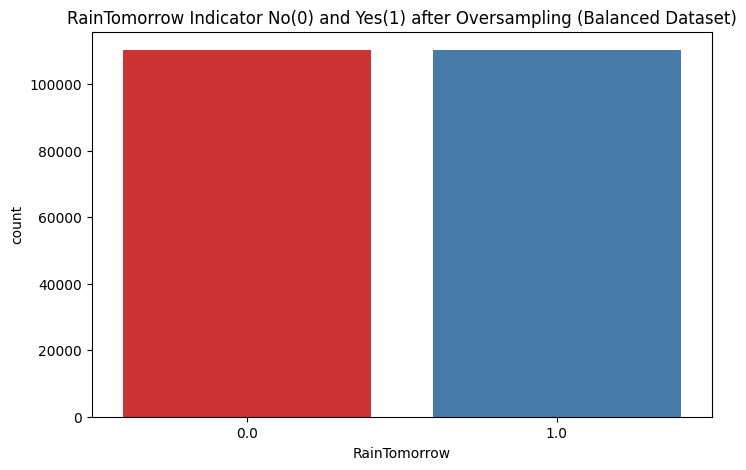

In [35]:
from sklearn.utils import resample

no = normalized_data[normalized_data.RainTomorrow == 0]
yes = normalized_data[normalized_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled_data = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
sns.countplot(x='RainTomorrow', data = oversampled_data, palette = "Set1").set(title='RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


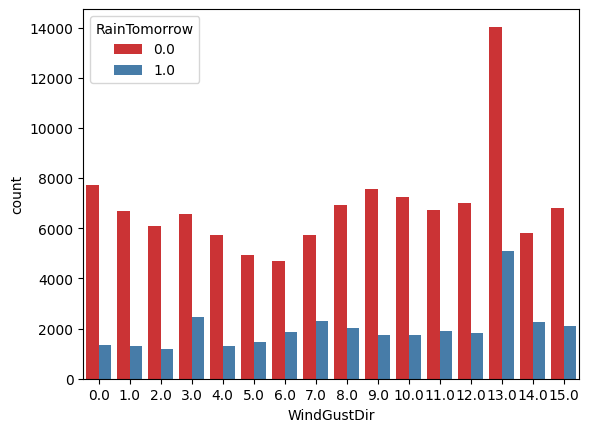

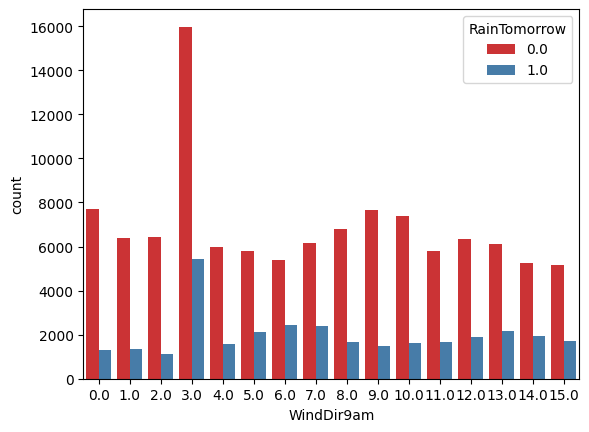

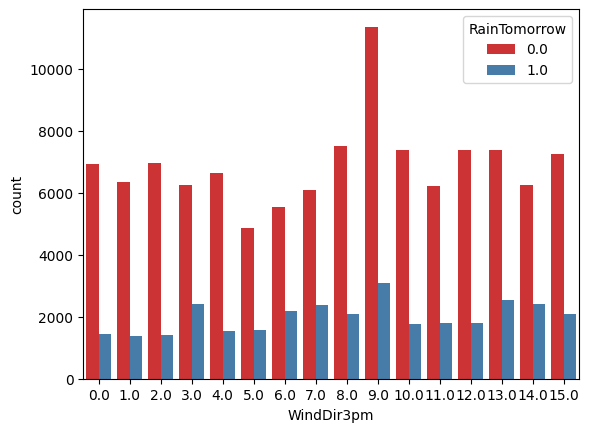

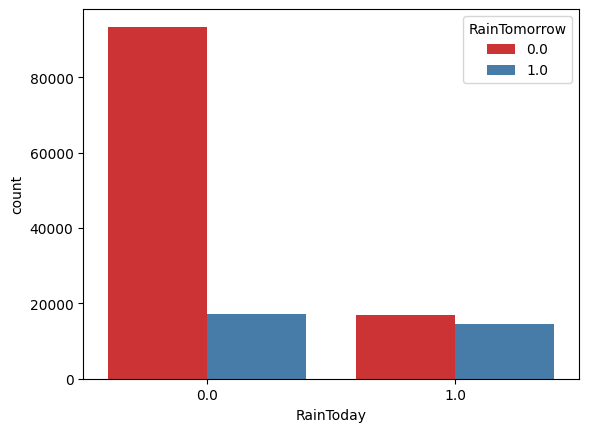

In [36]:
import seaborn as sns
normalized_data = imputed_data.copy()
categorical_features = [ 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday']
print(categorical_features)


for f in categorical_features:
  sns.countplot(x=f, data = normalized_data, palette = "Set1", hue = "RainTomorrow")
  plt.show()

In [37]:
normalized_data[numerical_features].columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

<Axes: >

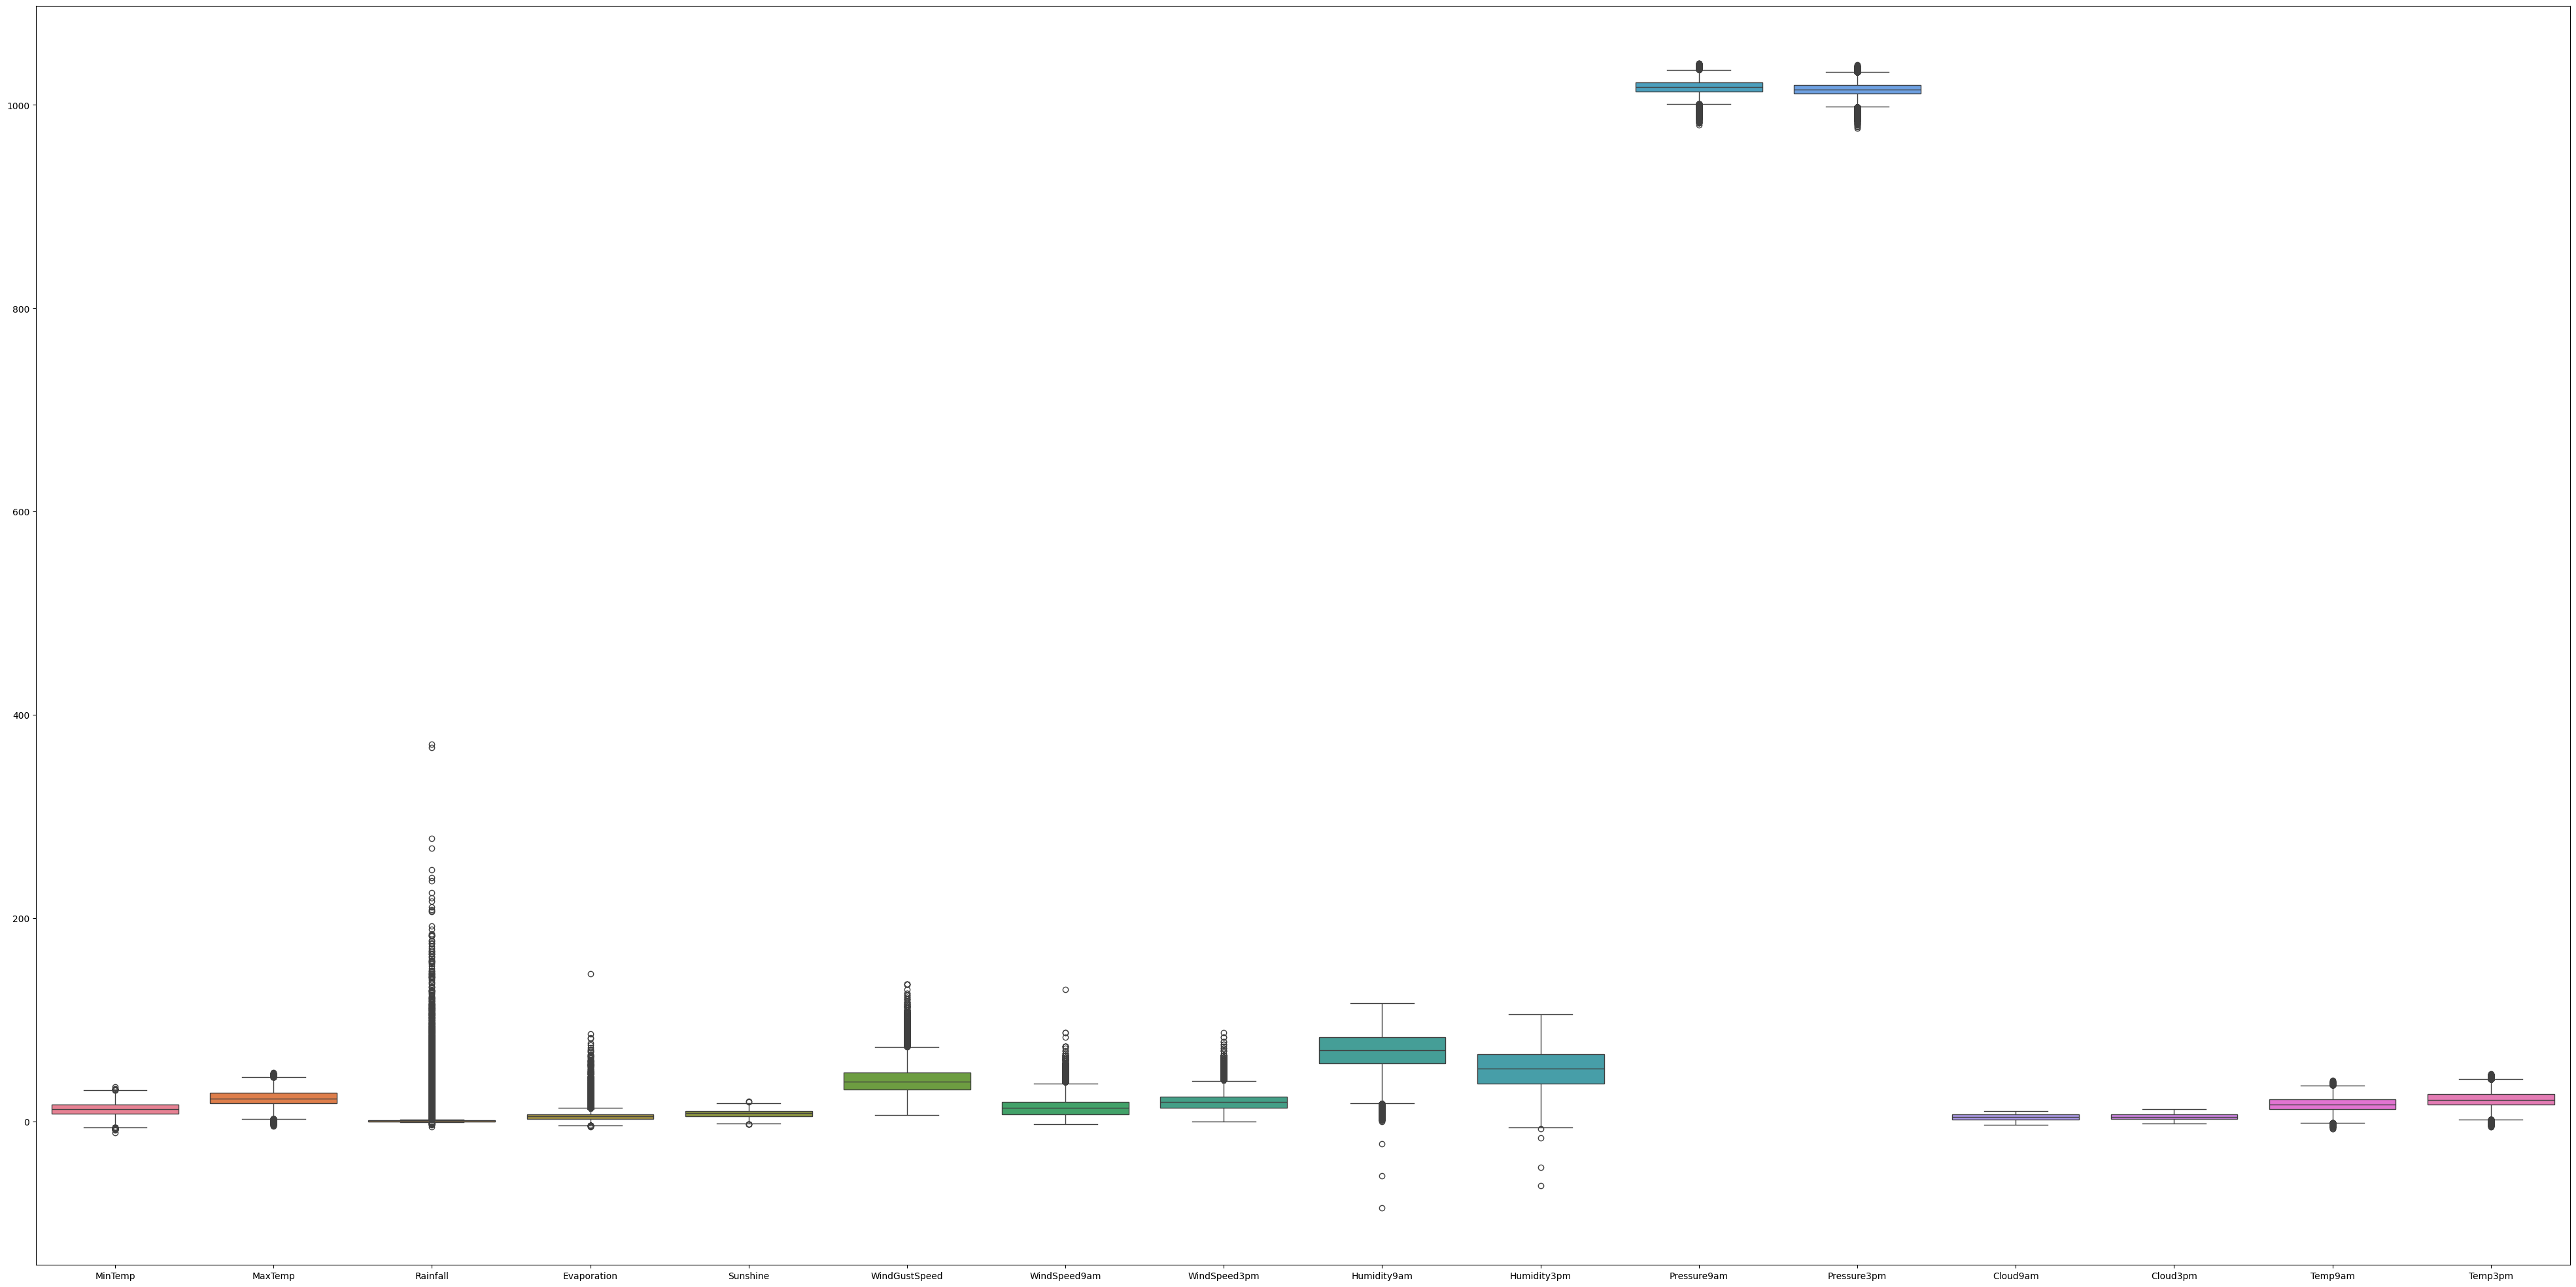

In [38]:
plt.figure(figsize=(50,25))
sns.boxplot(data=normalized_data[numerical_features])

In [39]:
import sklearn.preprocessing as preprocessing
scaled_data = normalized_data.copy()

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(scaled_data)
scaled_data = pd.DataFrame(r_scaler.transform(scaled_data), index=scaled_data.index, columns=scaled_data.columns)

<Axes: >

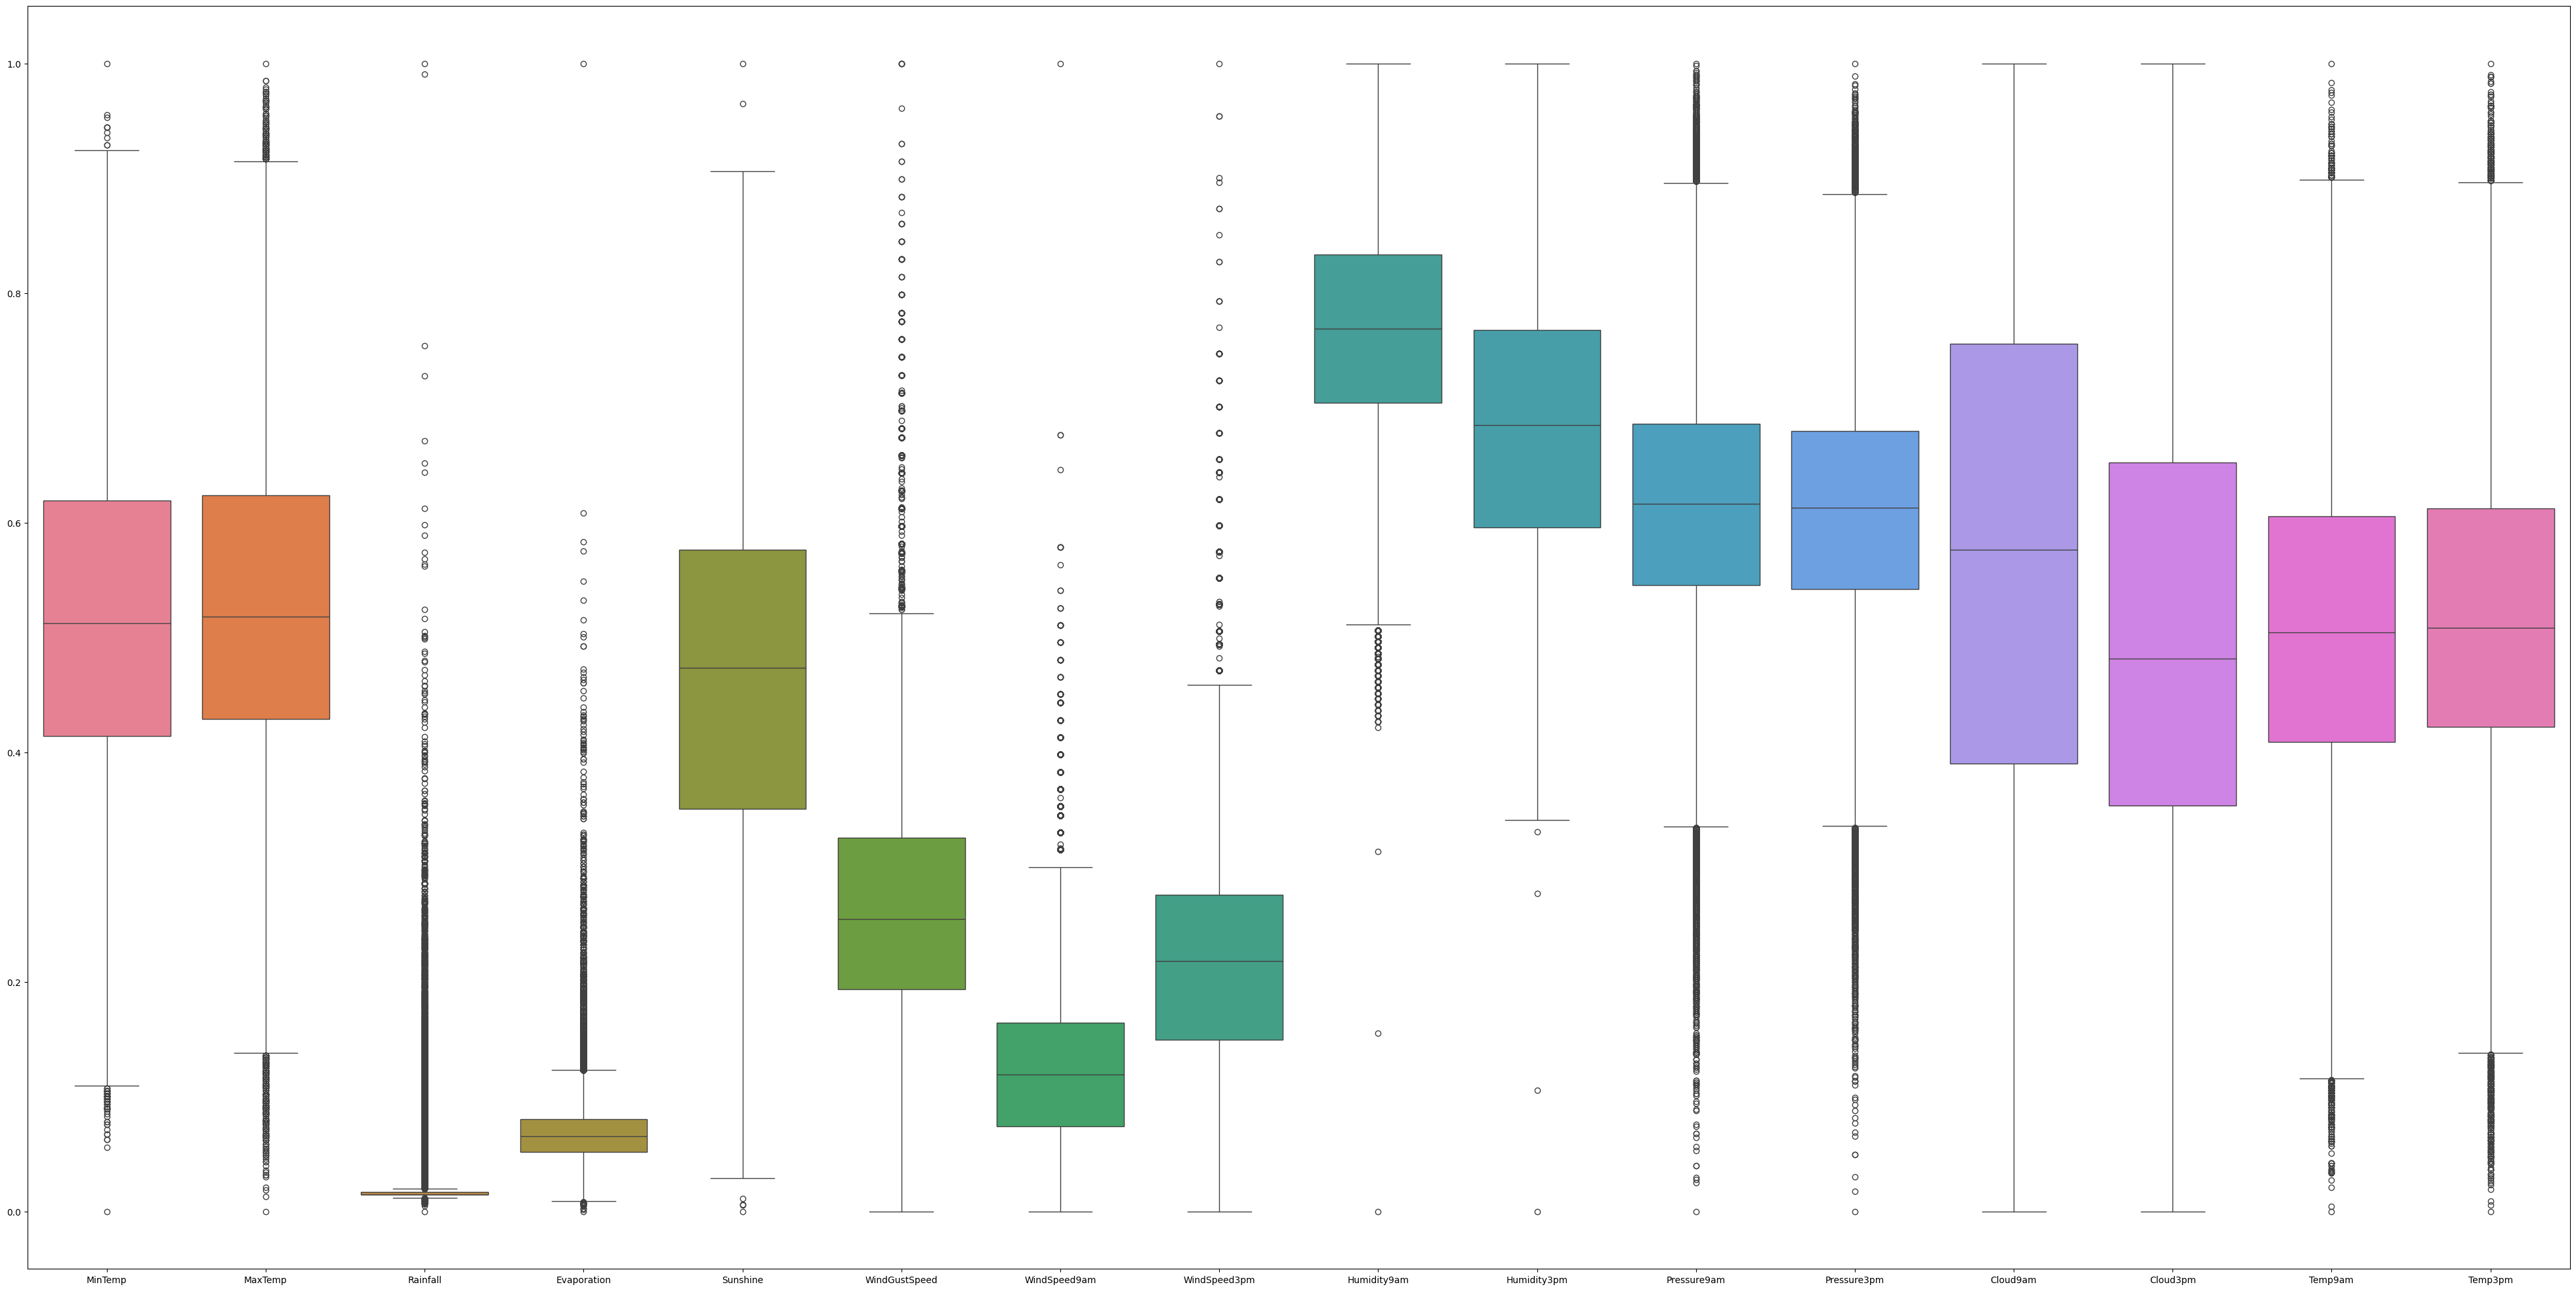

In [40]:
plt.figure(figsize=(50,25))
sns.boxplot(data=scaled_data[numerical_features])

In [41]:
outlier_features = ['Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm']
outlier_range = pd.DataFrame(columns = ["Feature", "Lowerbound", "Upperbound"])

for i,feature in enumerate(outlier_features):
    IQR = scaled_data[feature].quantile(0.75) - scaled_data[col].quantile(0.25)
    lower_bound = scaled_data[feature].quantile(0.25) - (IQR * 3)
    upper_bound = scaled_data[feature].quantile(0.75) + (IQR * 3)
    print(feature + "  outlier is < {lowerbound} and > {upperbound}".format(lowerbound=round(lower_bound,2), upperbound=round(upper_bound,2)))
    outlier_range.loc[i] = [feature, lower_bound, upper_bound]

Rainfall  outlier is < -0.04 and > 0.07
Evaporation  outlier is < -0.19 and > 0.32
WindGustSpeed  outlier is < -0.78 and > 1.3
WindSpeed9am  outlier is < -0.42 and > 0.66
WindSpeed3pm  outlier is < -0.68 and > 1.1
Humidity9am  outlier is < -1.8 and > 3.33
Humidity3pm  outlier is < -1.71 and > 3.07
Pressure9am  outlier is < -1.51 and > 2.74
Pressure3pm  outlier is < -1.5 and > 2.72


In [42]:
outlier_range

Feature  Lowerbound  Upperbound
0       Rainfall   -0.035940    0.067631
1    Evaporation   -0.189270    0.321161
2  WindGustSpeed   -0.782946    1.302326
3   WindSpeed9am   -0.419460    0.658286
4   WindSpeed3pm   -0.678161    1.103448
5    Humidity9am   -1.796110    3.334251
6    Humidity3pm   -1.708461    3.072149
7    Pressure9am   -1.512397    2.743802
8    Pressure3pm   -1.497600    2.720000

In [43]:
X = scaled_data.drop("RainTomorrow", axis=1)
y = scaled_data["RainTomorrow"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
X.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  0.041667  0.543546  0.523629  0.016377     0.074789  0.460249     0.866667   
1  0.041667  0.409950  0.565217  0.014783     0.074041  0.624385     0.933333   
2  0.041667  0.532413  0.576560  0.014783     0.089515  0.663052     1.000000   
3  0.041667  0.450029  0.620038  0.014783     0.076876  0.652139     0.266667   
4  0.041667  0.634837  0.701323  0.017439     0.082383  0.410531     0.866667   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  Pressure3pm  \
0       0.294574    0.866667    0.933333  ...     0.449587       0.4800   
1       0.294574    0.400000    1.000000  ...     0.497521       0.4912   
2       0.310078    0.866667    1.000000  ...     0.447934       0.5056   
3       0.139535    0.600000    0.000000  ...     0.613223       0.5712   
4       0.271318    0.066667    0.466667  ...     0.500826       0.4624   

   Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  Month  Year       Day  
0  0.828973  0.516839  0.508439  0.522073        0.0    1.0   0.1  0.000000  
1  0.386882  0.350588  0.514768  0.570058        0.0    1.0   0.1  0.033333  
2  0.393625  0.308159  0.594937  0.548944        0.0    1.0   0.1  0.066667  
3  0.326243  0.297931  0.533755  0.612284        0.0    1.0   0.1  0.100000  
4  0.755829  0.721418  0.527426  0.673704        0.0    1.0   0.1  0.133333  

[5 rows x 24 columns]

In [45]:
X.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000 -0.006225 -0.020575 -0.003585     0.084755 -0.007411   
MinTemp       -0.006225  1.000000  0.736727  0.104247     0.549504  0.105113   
MaxTemp       -0.020575  0.736727  1.000000 -0.073620     0.676899  0.546196   
Rainfall      -0.003585  0.104247 -0.073620  1.000000    -0.040490 -0.255398   
Evaporation    0.084755  0.549504  0.676899 -0.040490     1.000000  0.437333   
Sunshine      -0.007411  0.105113  0.546196 -0.255398     0.437333  1.000000   
WindGustDir   -0.005055 -0.136839 -0.212316  0.044404    -0.073864 -0.075815   
WindGustSpeed  0.072332  0.171240  0.064642  0.132442     0.241331 -0.033285   
WindDir9am    -0.004434 -0.029109 -0.212712  0.085354    -0.078455 -0.099419   
WindDir3pm     0.008325 -0.159394 -0.181549  0.047610    -0.047039 -0.049747   
WindSpeed9am   0.077822  0.175820  0.013768  0.087030     0.222378 -0.002385   
WindSpeed3pm   0.063851  0.174176  0.049142  0.057554     0.165494  0.065225   
Humidity9am   -0.001627 -0.238014 -0.508738  0.224117    -0.589612 -0.546888   
Humidity3pm    0.008496  0.002677 -0.510893  0.255277    -0.458191 -0.716728   
Pressure9am    0.037884 -0.448629 -0.329244 -0.166838    -0.305459  0.020306   
Pressure3pm    0.046333 -0.461745 -0.429998 -0.123118    -0.330227 -0.050504   
Cloud9am      -0.021252  0.086799 -0.340535  0.226379    -0.256128 -0.757896   
Cloud3pm      -0.015489  0.023336 -0.334772  0.201079    -0.258083 -0.787404   
Temp9am       -0.015436  0.902513  0.888175  0.010512     0.639962  0.349021   
Temp3pm       -0.023388  0.712215  0.984991 -0.077495     0.655973  0.568733   
RainToday     -0.004911  0.055947 -0.226764  0.501122    -0.197299 -0.360674   
Month         -0.008375 -0.204353 -0.164786 -0.030957    -0.039762  0.032747   
Year           0.022265  0.040013  0.058555 -0.009167     0.058016 -0.005120   
Day           -0.000004  0.001563 -0.000515  0.001194    -0.010032 -0.003474   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.005055       0.072332   -0.004434    0.008325  ...   
MinTemp          -0.136839       0.171240   -0.029109   -0.159394  ...   
MaxTemp          -0.212316       0.064642   -0.212712   -0.181549  ...   
Rainfall          0.044404       0.132442    0.085354    0.047610  ...   
Evaporation      -0.073864       0.241331   -0.078455   -0.047039  ...   
Sunshine         -0.075815      -0.033285   -0.099419   -0.049747  ...   
WindGustDir       1.000000       0.119065    0.356896    0.565814  ...   
WindGustSpeed     0.119065       1.000000    0.083690    0.137242  ...   
WindDir9am        0.356896       0.083690    1.000000    0.301298  ...   
WindDir3pm        0.565814       0.137242    0.301298    1.000000  ...   
WindSpeed9am      0.008430       0.615778    0.110978    0.050065  ...   
WindSpeed3pm      0.082502       0.696898    0.113444    0.089192  ...   
Humidity9am       0.068207      -0.218729    0.088307    0.026896  ...   
Humidity3pm       0.071528      -0.029668    0.150566   -0.002625  ...   
Pressure9am      -0.126588      -0.453784   -0.053647   -0.138868  ...   
Pressure3pm      -0.030681      -0.402139    0.045904   -0.033037  ...   
Cloud9am          0.078948       0.082005    0.118266    0.062322  ...   
Cloud3pm          0.079694       0.132044    0.083743    0.072286  ...   
Temp9am          -0.178200       0.143408   -0.114497   -0.176402  ...   
Temp3pm          -0.227763       0.025442   -0.219473   -0.195162  ...   
RainToday         0.127651       0.153094    0.168410    0.123130  ...   
Month             0.044115       0.061513    0.026215    0.035165  ...   
Year             -0.021880      -0.028497   -0.001550   -0.000677  ...   
Day              -0.001470      -0.009614   -0.005781   -0.000446  ...   

               Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
Location          0.037884     0.046333 -0.021252 -0.015489 -0.015436   
MinTemp          

<Axes: >

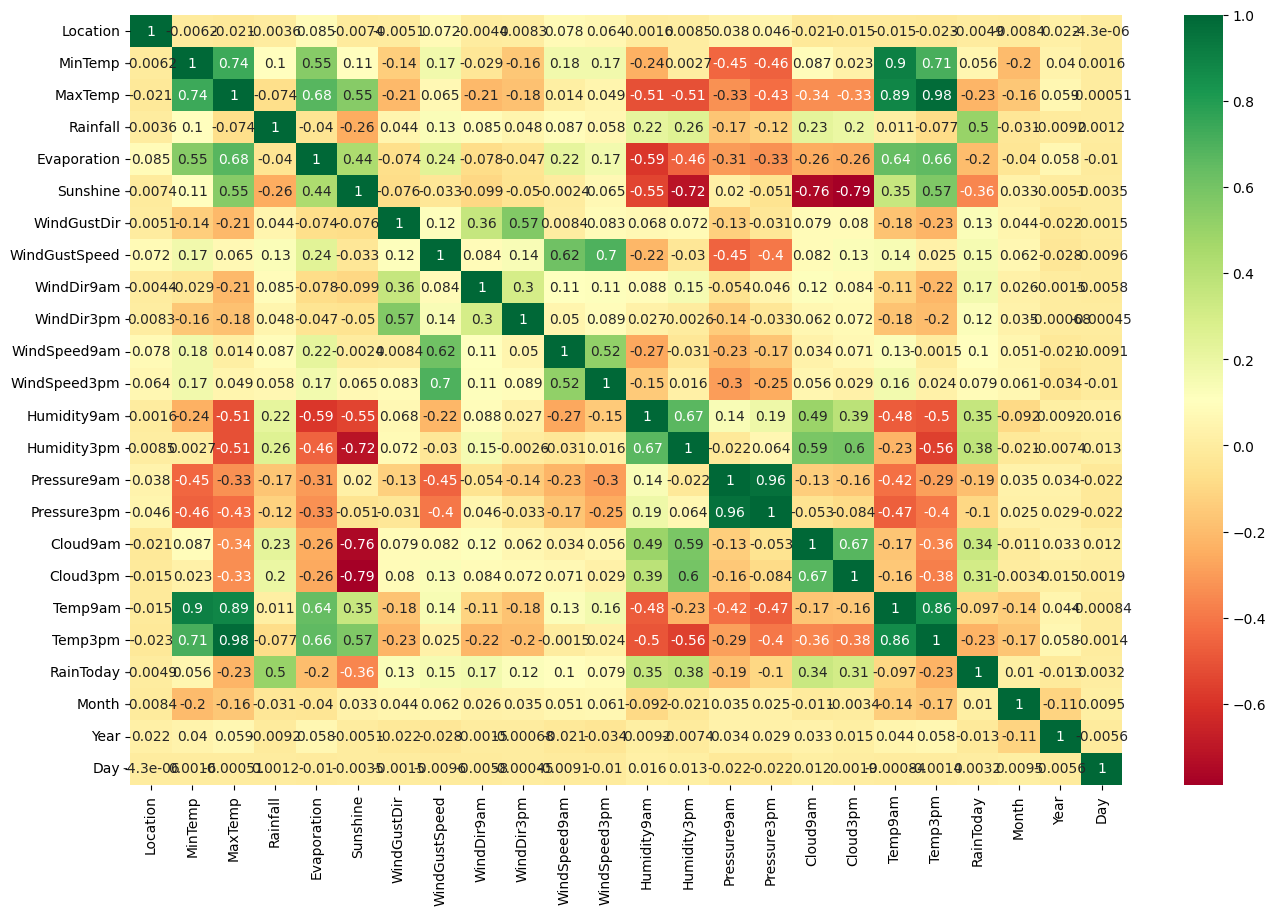

In [46]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(), annot=True, cmap='RdYlGn')

In [47]:
def correlation(df, threshold):

  col_corr = pd.DataFrame(columns = ['Feature1','Feature2','CorrelationCoefficient'])
  corr_matrix = df.corr()
  for i in range(0,len(corr_matrix.columns)):
    #print(abs(corr_matrix.iloc[i]))
    for j in range(i):
      curr = abs(corr_matrix.iloc[i,j])
      if curr > threshold:
        col_corr.loc[i] = [corr_matrix.columns[i],corr_matrix.columns[j], corr_matrix.iloc[i,j]]
        #col_corr.append(corr_matrix.columns[i])

  return col_corr

In [48]:
col_corr = correlation(X,0.75)
print(col_corr)

       Feature1     Feature2  CorrelationCoefficient
15  Pressure3pm  Pressure9am                0.959996
16     Cloud9am     Sunshine               -0.757896
17     Cloud3pm     Sunshine               -0.787404
18      Temp9am      MaxTemp                0.888175
19      Temp3pm      Temp9am                0.863419


In [49]:
correlated_set = list(col_corr['Feature1'])
correlated_set.extend(list(col_corr['Feature2']))
print(list(set(correlated_set)))

['Pressure9am', 'Cloud3pm', 'Cloud9am', 'Sunshine', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'MaxTemp']


<Axes: >

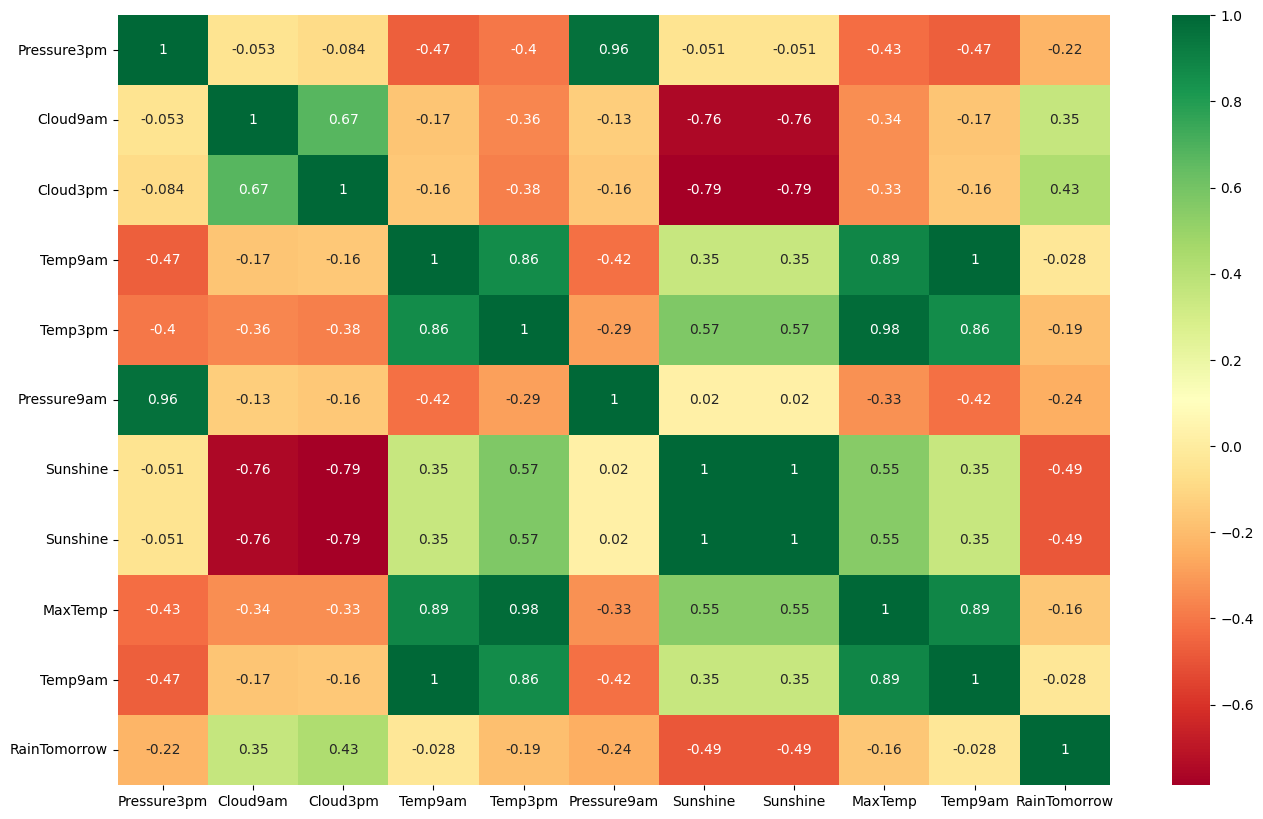

In [50]:
dependancy = correlated_set
dependancy.append('RainTomorrow')
plt.figure(figsize=(16,10))
sns.heatmap(scaled_data[dependancy].corr(), annot=True, cmap='RdYlGn')

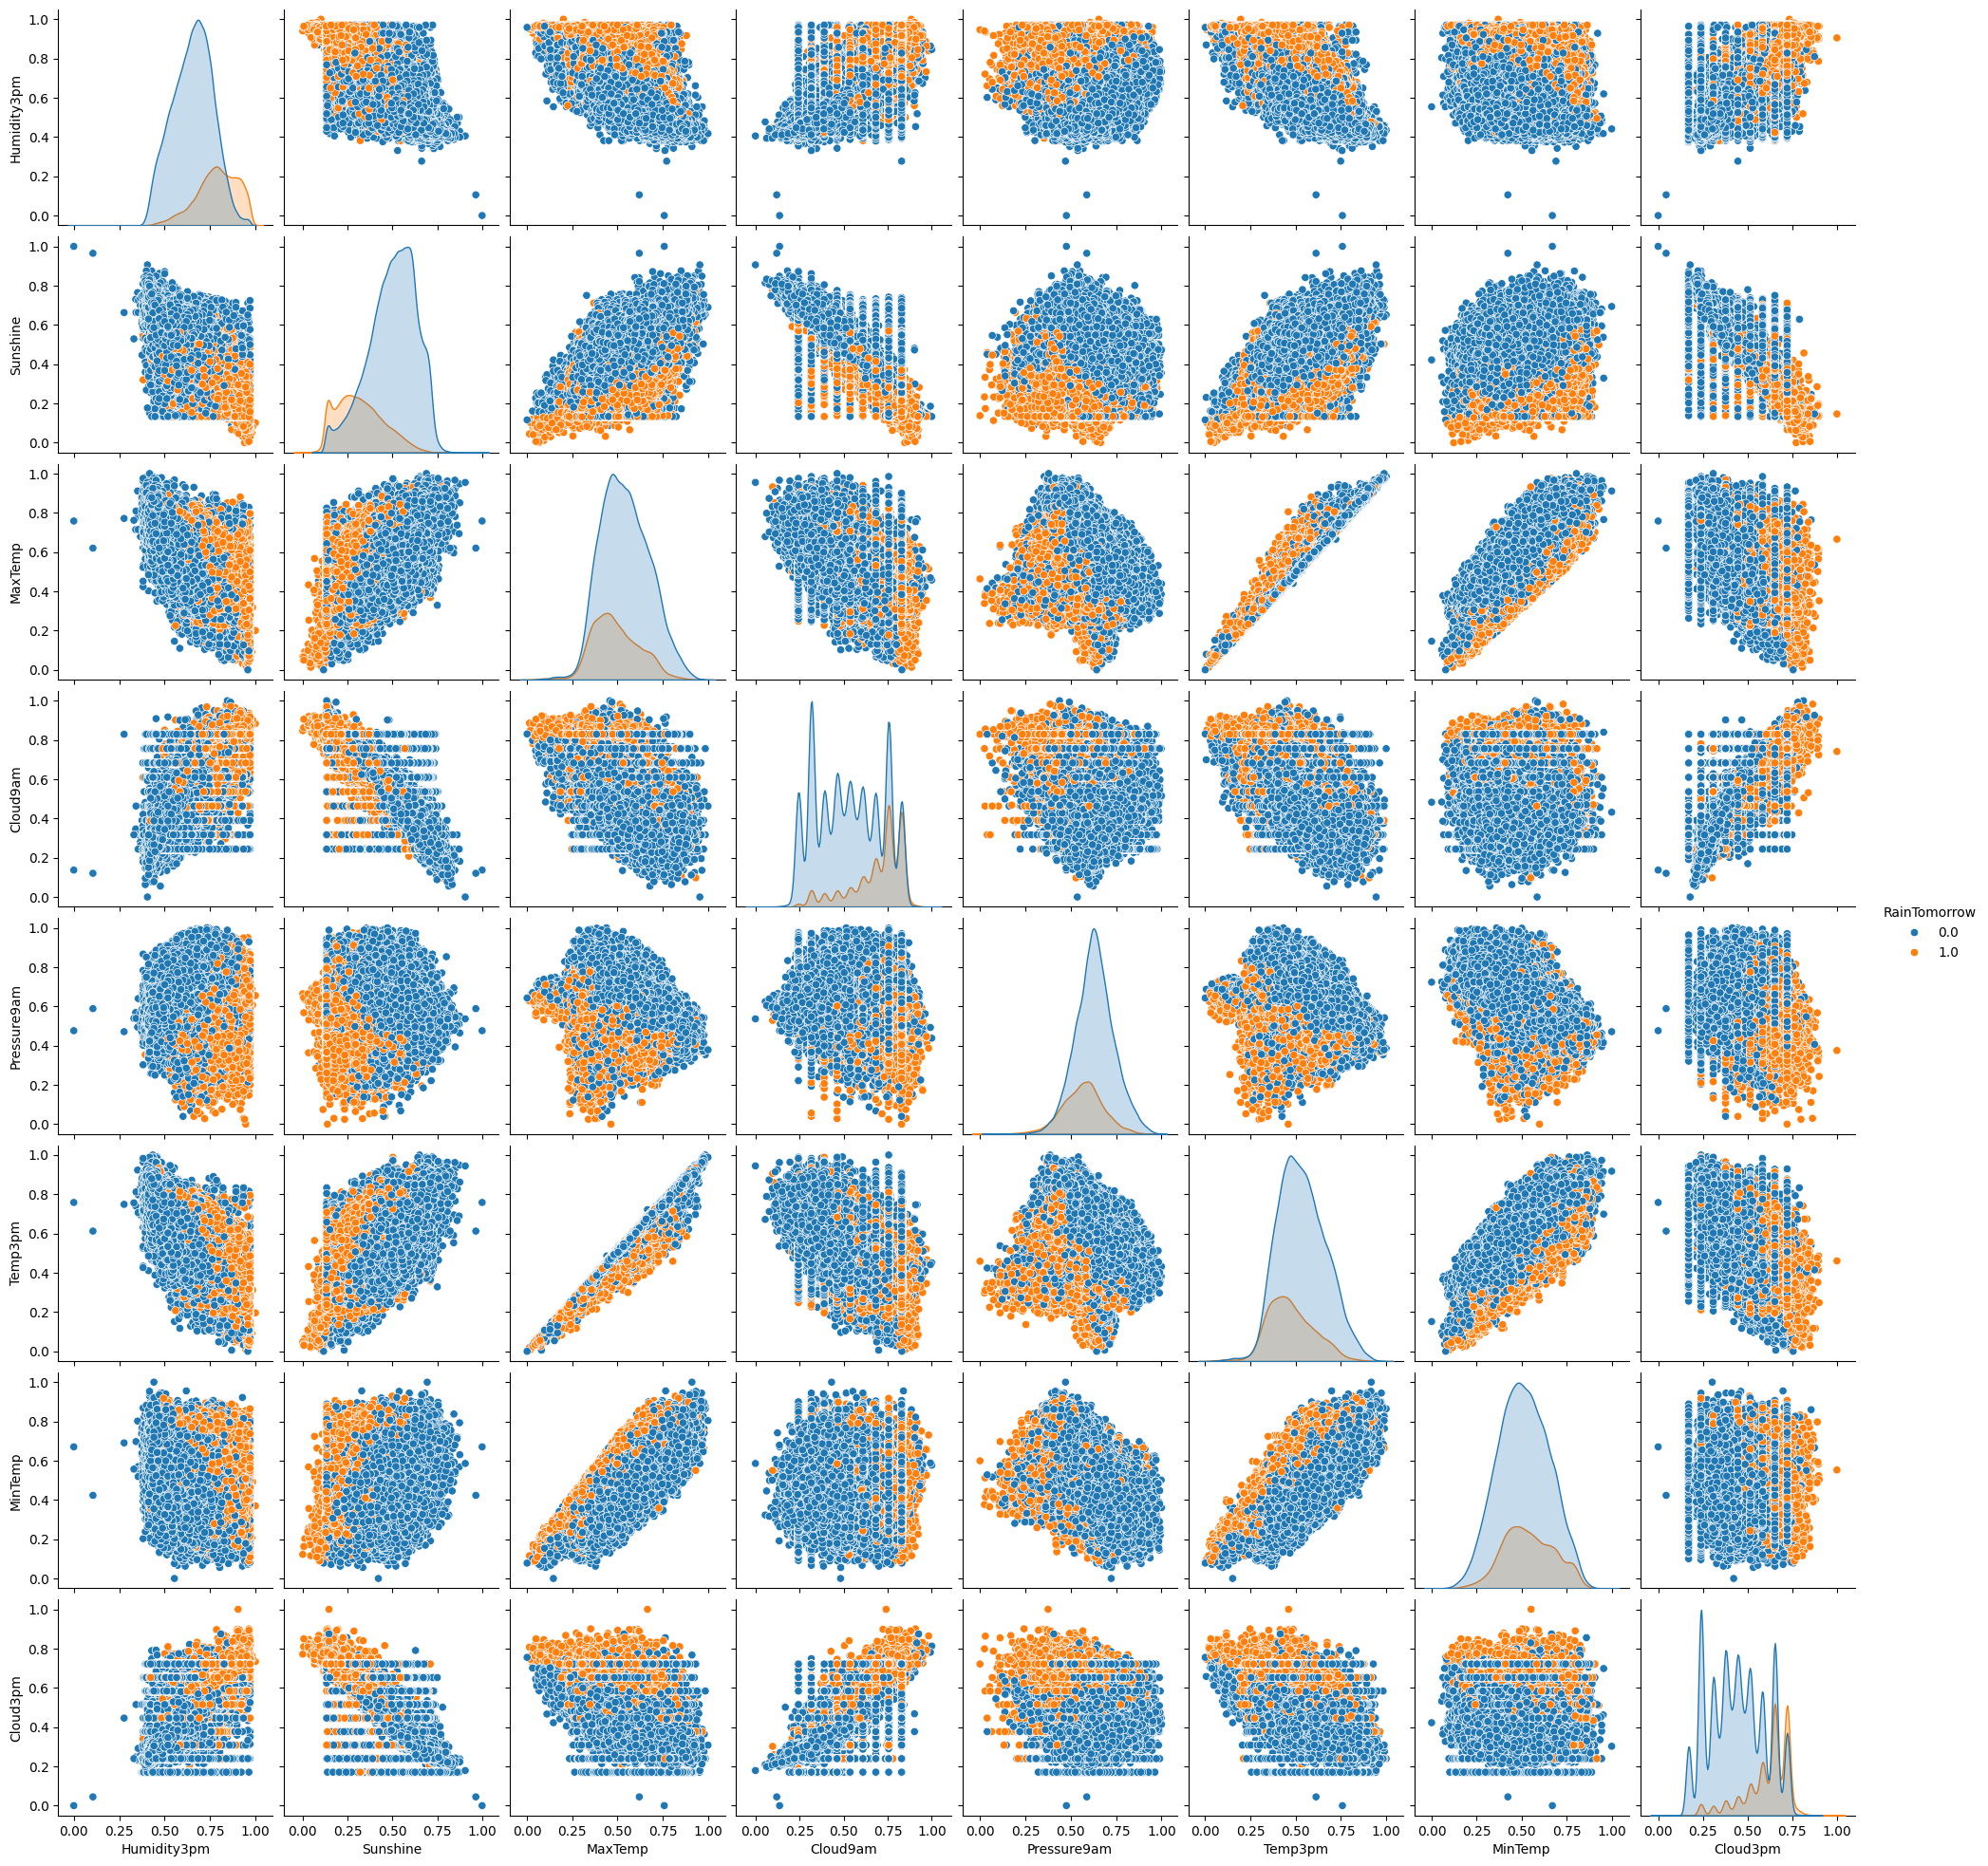

In [51]:
sns.pairplot(data = scaled_data, vars = ('Humidity3pm', 'Sunshine', 'MaxTemp', 'Cloud9am', 'Pressure9am',
       'Temp3pm', 'MinTemp', 'Cloud3pm'), hue='RainTomorrow' )
plt.show()

In [52]:
X_new=X.reset_index()

In [53]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
Kbest = X.columns[selector.get_support(indices=True)]

In [54]:
print(Kbest)

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
RandForest_RFE = RandomForestClassifier()
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [56]:
print("Best features chosen by RFE: \n")

for i in X_train.columns[rfe.support_]:
    print(i)

Best features chosen by RFE: 

MinTemp
MaxTemp
Sunshine
WindGustSpeed
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp3pm


In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
def prediction(X_train,X_test,y_train,y_test):

  X_train_RFE = rfe.transform(X_train)
  X_test_RFE = rfe.transform(X_test)
  RandForest_RFE = RandomForestClassifier()
  RandForest_RFE = RandForest_RFE.fit(X_train_RFE, y_train)

  # Making a prediction and calculting the accuracy
  y_pred = RandForest_RFE.predict(X_test_RFE)
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ',accuracy)
  print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

  # Print the Confusion Matrix and slice it into four pieces
  cm = confusion_matrix(y_test, y_pred)
  print('Confusion matrix\n\n', cm)
  print('True Positives(TP) = ', cm[0,0])
  print('True Negatives(TN) = ', cm[1,1])
  print('False Positives(FP) = ', cm[0,1])
  print('False Negatives(FN) = ', cm[1,0])

  # visualize confusion matrix with seaborn he[atmap
  cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                  index=['Predict Positive:1', 'Predict Negative:0'])
  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')



  # print classification accuracy
  classification_accuracy = (cm[0,0] + cm[1,1]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
  print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

  # print classification error
  classification_error = (cm[0,1] + cm[1,0]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
  print('Classification error : {0:0.4f}'.format(classification_error))

Accuracy:  0.8822391785927776
Mean squared error: 0.12
Confusion matrix

 [[21156   911]
 [ 2438  3934]]
True Positives(TP) =  21156
True Negatives(TN) =  3934
False Positives(FP) =  911
False Negatives(FN) =  2438
Classification accuracy : 0.8822
Classification error : 0.1178


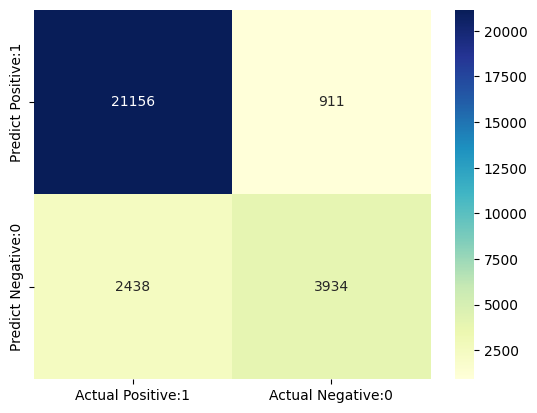

In [58]:
prediction(X_train,X_test,y_train,y_test)

In [59]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [60]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0., 0., 0., ..., 0., 0., 1.])

In [61]:
logreg.predict_proba(X_test)[:,0]

array([0.86982767, 0.91944913, 0.83691326, ..., 0.98541939, 0.78553711,
       0.30586266])

In [62]:
logreg.predict_proba(X_test)[:,1]

array([0.13017233, 0.08055087, 0.16308674, ..., 0.01458061, 0.21446289,
       0.69413734])

In [63]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8576


In [64]:
!pip install datasist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.8 MB/s eta 0:00:00


In [65]:
from datasist.structdata import detect_outliers


no_outlier_data = scaled_data.copy()

In [66]:
print(len(no_outlier_data))

142193


In [67]:
for i in range(len(outlier_range)):
  no_outlier_data = no_outlier_data[no_outlier_data[outlier_range.loc[i, 'Feature']] >= outlier_range.loc[i, 'Lowerbound']]
  no_outlier_data = no_outlier_data[no_outlier_data[outlier_range.loc[i, 'Feature']] <= outlier_range.loc[i, 'Upperbound']]

len(no_outlier_data)

138103

Accuracy:  0.8825169255276782
Mean squared error: 0.12
Confusion matrix

 [[20928   917]
 [ 2328  3448]]
True Positives(TP) =  20928
True Negatives(TN) =  3448
False Positives(FP) =  917
False Negatives(FN) =  2328
Classification accuracy : 0.8825
Classification error : 0.1175


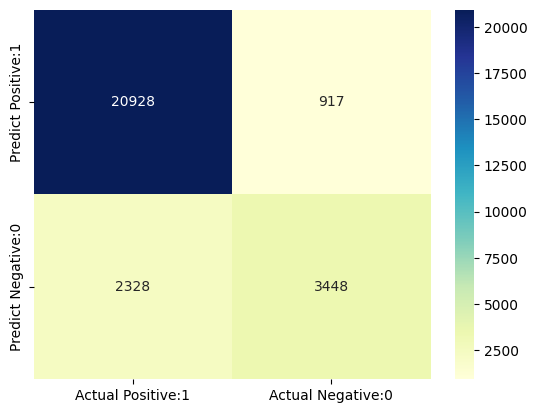

In [68]:
X = no_outlier_data.drop("RainTomorrow", axis=1)
y = no_outlier_data["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)